# Task 2:-To Explore supervised Machine learning
## Problem Statement:-
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables. Data can be found at http://bit.ly/w-data

Importing Needed packages

In [127]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns
%matplotlib inline


<h2 id="reading_data">Reading the data in</h2>

In [109]:
df = pd.read_csv("http://bit.ly/w-data")

# take a look at the dataset
df.head()



,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


<h2 id="data_exploration">Data Exploration</h2>
Lets first have a descriptive exploration on our data.

In [110]:
# summarize the data
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [111]:
df.isnull().any()

Hours     False
Scores    False
dtype: bool

## Data Visualization

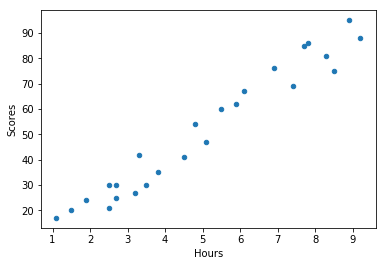

In [112]:
df.plot(kind='scatter',x='Hours',y='Scores')

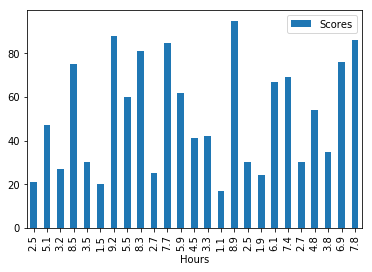

In [113]:
df.plot(kind='bar',x='Hours',y='Scores')

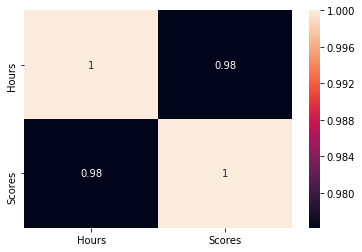

In [115]:
sns.heatmap(df.corr(),annot=True)

## Preparing Data

In [114]:
#Diving data into two variables x and y.
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

## Creating train and test dataset
Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set. 
This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the data. It is more realistic for real world problems.

This means that we know the outcome of each data point in this dataset, making it great to test with! And since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing.


In [117]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(20, 1)
(5, 1)
(20,)
(5,)


<h2 id="simple_regression">Simple Regression Model</h2>
Linear Regression fits a linear model with coefficients $\theta = (\theta_1, ..., \theta_n)$ to minimize the 'residual sum of squares' between the independent x in the dataset, and the dependent y by the linear approximation. 

In [131]:
import time
from sklearn.linear_model import LinearRegression
model=LinearRegression()
s=time.time()
model.fit(x_train,y_train)
print("Training complete")
print((time.time()-s)*1000,"ms")

Training complete
0.9968280792236328 ms


 __Coefficient__ and __Intercept__ in the simple linear regression, are the parameters of the fit line. 
Given that it is a simple linear regression, with only 2 parameters, and knowing that the parameters are the intercept and slope of the line, sklearn can estimate them directly from our data. 
Notice that all of the data must be available to traverse and calculate the parameters.


In [132]:
print("coefficients:",model.coef_)
print("Intercept:",model.intercept_)

coefficients: [9.91065648]
Intercept: 2.018160041434683


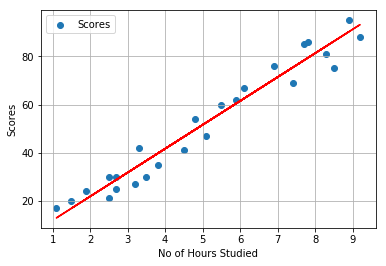

In [133]:
plt.scatter(x,y)
plt.plot(x,model.predict(x),"-r")
plt.xlabel("No of Hours Studied")
plt.ylabel("Scores")
plt.legend()
plt.grid()

### Making Predictions

In [134]:
y_pred=model.predict(x_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 
print(df)

    Actual  Predicted
5       20  16.884145
2       27  33.732261
19      69  75.357018
16      30  26.794801
11      62  60.491033


## Query:- What will be predicted score if a student study for 9.25 hrs in a day?

In [124]:
# Solution
print("No of Hours = ",9.25)
print("Predicted Score = ", model.predict([[9.25]])[0])

No of Hours =  9.25
Predicted Score =  93.69173248737538


## Evaluation
we compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set: 
<ul>
    <li> Mean absolute error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.</li>
    <li> Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean absolute error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.</li>
    <li> Root Mean Squared Error (RMSE): This is the square root of the Mean Square Error. </li>
</ul>

In [125]:

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665
